### Fun with Word Embeddings
__First we need to import all necessary modules. If you see a number in the box on the left after running the cell you are good to go!
We're using gensim's word2vec implementation. [Documentation here!](https://radimrehurek.com/gensim/models/word2vec.html)__

What's the purpose: What are they good for!

__Natural Language Processing__
![wiki is up-todate](https://upload.wikimedia.org/wikipedia/commons/8/8b/Automated_online_assistant.png)

- Syntactical Analysis: Part-of-speech tagging, Parsing
- Semantics: __Lexical semantics__, Machine translation, Named Entity Recognition, Natural language generation, Natural language understanding, Question answering, Sentiment analysis, Topic segmentation and recognition, Automatic summarization, 
- Sarcasm detection, Emoji2Vec
- Recent trend: Use a word embedding and your system is gonna work better!

- So where is the fun? ...

This is a Jupyter Notebook
Next to Jupyter you also need a few other python modules.
Get them with pip:

`pip install jupyter gensim matplotlib scikit-learn bokeh`

Download [this notebook](https://transfluxus.github.io/NLP/fun_with_wems/word2vec.ipynb) and use the terminal to go to its directory. Then start Jupyter with
`jupyter notebook`
And open this notebook...

The next part will import all necessary libraries.

In [2]:
import gensim.downloader as api
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
%matplotlib inline

__Now we can download a Word Embedding and load it/ or just load it from this folder.__

If you want other Word Embeddings:
- [Facebook research released a library for Multilingual Unsupervised or Supervised word Embeddings](https://github.com/facebookresearch/MUSE)
- [More models you can download staight with in the following cell](https://github.com/RaRe-Technologies/gensim-data)
- [Popular: GloVe](https://nlp.stanford.edu/projects/glove/)
- [Google's Word2Vec](https://code.google.com/archive/p/word2vec/)
- [ConceptNet5: Another guy, who says he has the best word embedding](https://github.com/commonsense/conceptnet-numberbatch)
- [HistWords: Word Embeddings for Historical Text](https://nlp.stanford.edu/projects/histwords/)
- [Spanish Billion Word Corpus and Embeddings](http://crscardellino.me/SBWCE/)

In [13]:
# download the model file if it is not downloaded yet! 
model_file = api.load("glove-wiki-gigaword-200", return_path=True)
print(model_file)

/home/ra/gensim-data/glove-wiki-gigaword-200/glove-wiki-gigaword-200.gz


In [14]:
#model_file = "/media/ra/hd2/data/data/models/GoogleNews-vectors-negative3002.bin.gz"

Load the model fil into the memory. This might take 1-2 minutes

In [ ]:
model = KeyedVectors.load_word2vec_format(model_file)

Some documentation on [_gensims_ Word2Vec module](https://radimrehurek.com/gensim/models/word2vec.html)

In [ ]:
#model.similar_by_word("barcelona") 
# or get more words: 
model.similar_by_word("Barcelona", topn=100) 

__The famous analogy: _king_ - _man_ + _woman_ ≈ X:__

In [8]:
model.most_similar_cosmul(positive=["wine","barley"], negative=["beer"], topn=10)

MemoryError: 

The ruling man is called king. What is the ruling woman called?

> king - man  = __queen__ - woman

> king - man  = __X__ - woman

> king - man  + woman = __X__ 

> `+` king, woman

> `-` man

----

From barley I make beer. How do I make wine?
> beer - marley = wine - X

> beer - barley + X = wine

> X  = wine - beer + barley

Ok, ok. Why beer - marley, why not the other way around. or why not beer + marley.
something + something else doesn't describe the relation between 2 vectors (words)

![from b to a](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Vector_subtraction.png/320px-Vector_subtraction.png)

What you substract from what doesn't matter. No matter how you put it, when you ask for something, the equation will always gonna look the same in the end:

So instead of `king - man = queen - woman` we could write `man - king = woman - queen`.

In [7]:
model.most_similar_cosmul(positive=["large","smaller"], negative=["small"])
# model.most_similar_cosmul(positive=["large","small"], negative=["smaller"])
# model.most_similar_cosmul(positive=["larger","small"], negative=["smaller"])
# model.most_similar_cosmul(positive=["merkel","spain"], negative=["germany"])
# model.most_similar_cosmul(positive=["berlin","spain"], negative=["barcelona"])
# model.most_similar_cosmul(positive=["microsoft","zuckerberg"], negative=["facebook"])
# model.most_similar_cosmul(positive=["spain","alps"], negative=["switzerland"])
# model.most_similar_cosmul(positive=["europe","noodles"], negative=["asia"])
# model.most_similar_cosmul(positive=["spain","nietzsche"], negative=["germany"])
# model.most_similar_cosmul(positive=["spain","funny"], negative=["germany"])

# 1.
# model.most_similar_cosmul(positive=["beer","apple"], negative=["barley"])
# 2.
# model.most_similar_cosmul(positive=["wine","barley"], negative=["beer"])

[('larger', 0.984496533870697),
 ('bigger', 0.8959908485412598),
 ('size', 0.854392945766449),
 ('huge', 0.831322193145752),
 ('significantly', 0.8214669227600098),
 ('largest', 0.8193754553794861),
 ('than', 0.8136564493179321),
 ('sized', 0.8128951787948608),
 ('less', 0.8116415143013),
 ('considerably', 0.8104233145713806)]

In [8]:
model.most_similar_cosmul(positive=["spain","funny"], negative=["germany"])

[('charming', 0.8638376593589783),
 ('irreverent', 0.8598102331161499),
 ('cide', 0.8541579246520996),
 ('humor', 0.8449431657791138),
 ('wonderfully', 0.8356435894966125),
 ('amusing', 0.8334013223648071),
 ('quirky', 0.8278380036354065),
 ('offbeat', 0.8266856074333191),
 ('scary', 0.8240430355072021),
 ('flamenco', 0.8229984045028687)]

__How can we check if a word is in the model:__

In [9]:
my_word = "london"
# so easy (thanks python!)
exists_in_model = my_word in model
print("is %s in the model? - %s" % (my_word, "jepp" if exists_in_model else 'nope')) 

is london in the model? - jepp


__Which word doesn't fit?__

In [10]:
model.doesnt_match("barcelona madrid england berlin".split())

/home/ra/.virtualenvs/nlp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'england'

__If you just like to look at numbers: How similar are these 2.__ 

__1: Very similar__
    
__0: Not similar at all__

In [11]:
model.similarity('woman', 'man')

/home/ra/.virtualenvs/nlp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.75200856

__What fits best to Barcelona? city, england or pizza?__

In [12]:
model.most_similar_to_given("barcelona",["dog","england","pizza","berlin"])

/home/ra/.virtualenvs/nlp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'berlin'

__What's closer to Barcelona then messi???__

In [13]:
model.words_closer_than("barcelona","messi")

['madrid',
 'milan',
 'fc',
 'bayern',
 'valencia',
 'marseille',
 'porto',
 'atletico',
 'ajax',
 'deportivo',
 'sevilla',
 'bilbao',
 'villarreal',
 'mallorca',
 'zaragoza',
 'espanyol',
 'eindhoven',
 'barca']

__How many words are more similar to barcelona than 'catalonia'__?

In [14]:
model.rank("barcelona","catalonia")
# this is like:
# len(model.words_closer_than("barcelona","catalonia")) + 1

53

__Let's do something more complex now. Let's get the 100 most similar (`topn` in the code) words to barcelona.
Then we smash them from their 'k' dimensions down to 2. Then we plot them__

In [15]:
# get the 100 most similar words
bcn_sims = model.most_similar_cosmul(positive=["barcelona"], topn=100)
print("most similar:",bcn_sims[0]) # print the most similar
# just take the words
bcn_sims = ["barcelona"] + [sim[0] for sim in bcn_sims]
print("10 most similar words:",bcn_sims[:10]) # print first 5 words
# get the vectors of all these words
bcn_sim_vecs = [model[sim] for sim in bcn_sims]
print("Every vector has %s values... it looks like this:\n %s" % (len(bcn_sim_vecs[0]), bcn_sim_vecs[0]))

most similar: ('madrid', 0.8806903958320618)
10 most similar words: ['barcelona', 'madrid', 'valencia', 'barca', 'sevilla', 'villarreal', 'porto', 'zaragoza', 'deportivo', 'eindhoven']
Every vector has 200 values... it looks like this:
 [-4.7312e-01  2.0956e-01 -1.0924e+00 -5.4544e-02  7.3559e-01 -1.4950e-01
  2.8401e-01 -2.1766e-01  1.0815e+00  3.2619e-01 -7.3391e-01  3.3008e-01
 -1.2081e-01  1.0106e+00  3.5990e-01 -1.1592e-01  9.3493e-01  4.7742e-01
 -2.7512e-01 -8.5453e-01  7.2421e-01  1.4244e+00 -1.3408e-01 -1.7042e-01
  3.9561e-01 -1.8588e-01  2.2819e-01 -1.0597e-01  5.1192e-02  1.9851e-01
  3.0899e-03 -2.9029e-01 -5.7028e-01 -3.4764e-01 -2.6859e-01 -2.5920e-01
 -6.5688e-01  4.7606e-02  4.2148e-01 -2.8160e-01 -3.6037e-01 -3.3847e-01
  1.8201e-01  2.4157e-01  1.2639e-01  4.3211e-01 -8.2687e-02  1.8257e-01
 -4.3537e-01  4.8175e-02 -3.9762e-02 -6.1704e-01  3.9972e-01  9.4107e-01
  2.8909e-01 -3.6952e-01  6.4810e-02 -6.1562e-01  4.2312e-01  6.9902e-01
  3.6696e-03 -6.8114e-01  2.1200e

__Definition of a function that draws a bunch of 2d points with labels, and colors and circlesize:
We use 4 lists which must all have the same length. `colors` and `size` can be ommited.
The 4 lists look like:__

`data = [[x0, y0], [x1, y1], ...]`

`labels = ["barcelona", "something", ...]`

`colors = [0, 1, ...]` Here we just need integer numbers (for the groups of colors)

`size = [100, 200, ...]`

__t-SNE or t-Distributed Stochastic Neighbor Embedding allows us to reduce the dimensionality of a dataset. Obviously some details get losts... But it's trying to keep points close that were close to each other before the transformation__

This is a nice interactive page about the tricky parts of it: https://distill.pub/2016/misread-tsne/

This is documentation to the implementation we are using. It explains the parameters you can set:
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

the dimension of the embedded space is per default 2. that's why we don't need to specify the `n_components` parameters.

In [74]:
from tbias.plot import word_vecs_tsne_groups
word_vecs_tsne_groups(bcn_sims, bcn_sim_vecs)


Loading BokehJS ...

Now we want to test a bunch of words and see to which city they are most similar to.

__Is pizza more similar to paris, barcelona, brussels or berlin?__

We keep these words in `compare_word_list` and our cities in `compare_to`.

Then we can use the `most_similar_to_given` function for each word.

Then we color code it and draw it...

/home/ra/.virtualenvs/nlp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


pizza : rome
beer : berlin
football : barcelona
peace : paris
war : berlin
love : paris
santos : barcelona
beer : berlin
döner : berlin
sun : rome
fish : brussels
winter : rome
king : rome
germany : berlin
tower : paris
water : rome
warm : barcelona
cold : berlin


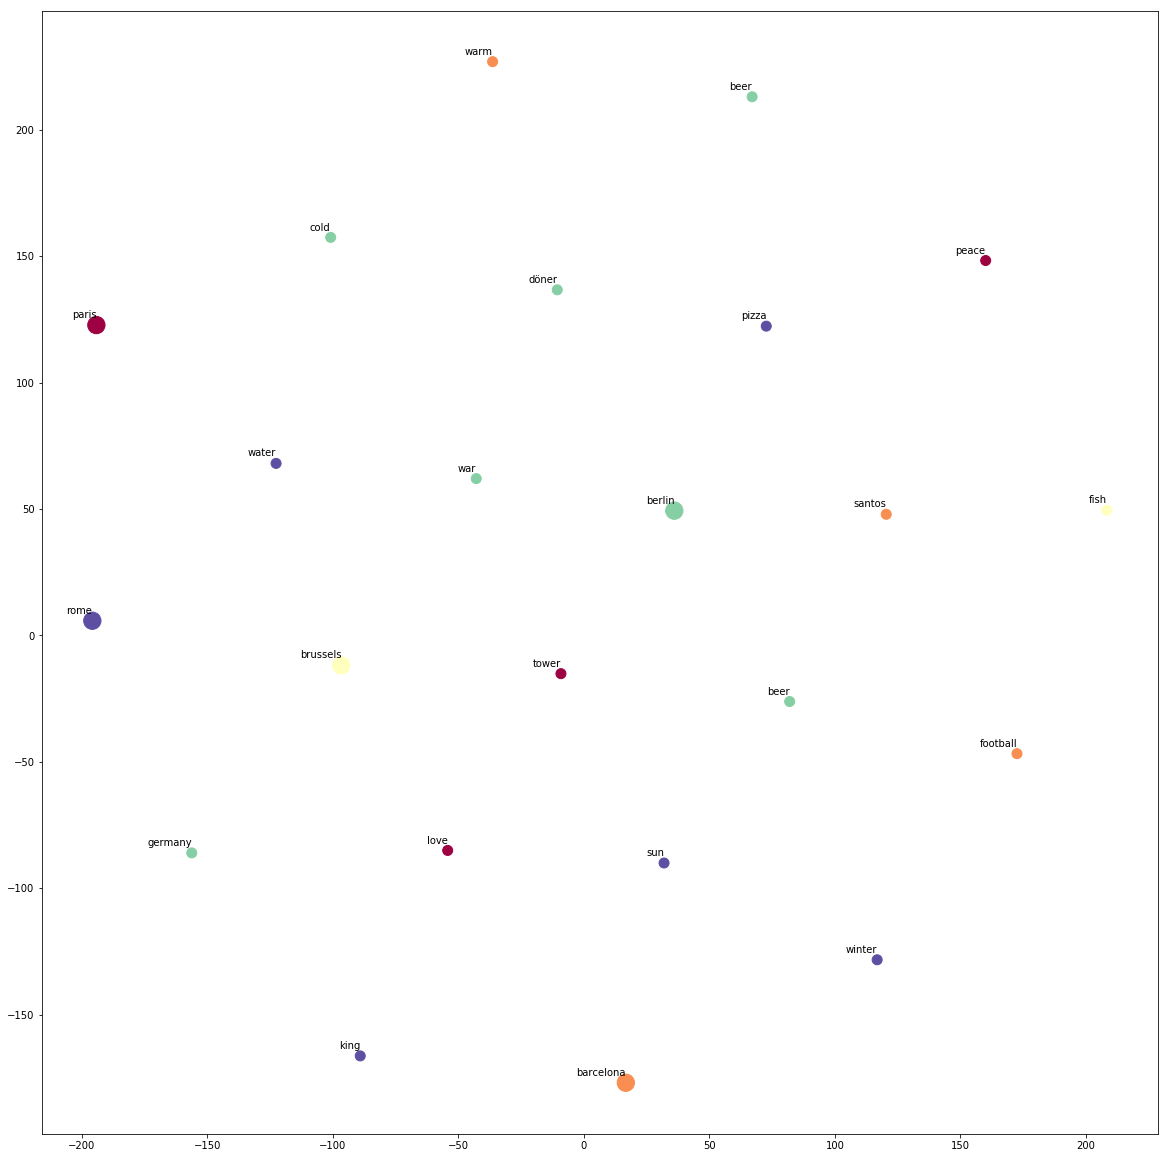

In [19]:
compare_word_list = ["pizza","beer","football","peace","war","love",
                     "santos","beer","döner","sun","fish","winter","king","germany","tower","water","warm", "cold"]

compare_to = ["paris","barcelona","brussels","berlin", "rome"]


# check for every word if it exits in the model. otherwise : kick it out
for word_list in [compare_word_list, compare_to]:
    for ind,word in enumerate(word_list):
        if not word in model:
            del word_list[ind]
            print("gotta kick out:",word)

# for each word save the most similar city
most_similar = []
for word in compare_word_list:
    most_similar_to = model.most_similar_to_given(word,compare_to)
    most_similar.append(most_similar_to)
    print(word,":", most_similar_to)
    
# mix the 2 lists together: words + cities
show_words = compare_word_list + compare_to
# get the vectors of all words in 2d
word_vecs_2d = TSNE().fit_transform([model[word] for word in show_words])
# set the color_index for each most_similar and the cities by the index of the city in the list of cities
colors = [compare_to.index(sim) for sim in most_similar] + [compare_to.index(word) for word in compare_to]
# set the size the circles of all words to 100 and all cities to 300
sizes = ([100] * len(compare_word_list)) + ([300] * len(compare_to))
# plot it!
plot(word_vecs_2d, show_words, colors, sizes)

__In a rudimantary way, we can also get the similarity of sentences.
We need to split a sentence into the single words and kick all so-called stopwords out: a, the, by, had, and, so...
There is [a whole list in this file](stopwords.txt)__

In [ ]:
stopwords = open('stopwords.txt').read().split('\n')

def sent_sim(sen1, sen2):
    words1 = sen1.lower().split()
    words1 = [w for w in words1 if w not in stopwords]
    words2 = sen2.lower().split()
    words2 = [w for w in words2 if w not in stopwords]
    return model.n_similarity(words1,words2)

In [ ]:
sentence1 = "Barcelona is a sunny place"
sentence2 = "Berlin in winter is a great place , not"
sentence3 = "my cat garfield was chasing a mouse"

print(sent_sim(sentence1, sentence2))
print(sent_sim(sentence1, sentence3))
print(sent_sim(sentence2, sentence3))

## Word Embedding Association Test

In [39]:
from tbias.weat import WEAT
weat = WEAT(model)

In [75]:
X_science = set('science, technology, physics, chemistry, Einstein, NASA, experiment, astronomy'.lower().split(', '))
Y_arts = set('poetry, art, Shakespeare, dance, literature, novel, symphony, drama'.lower().split(', '))
attr_male = 'male, man, boy, brother, he, him, his, son'.split(', ')
attr_female = 'female, woman, girl, sister, she, her, hers, daughter'.split(', ')

In [76]:
# results 2 values effect-size and p-value
weat.perform_test(X_science, Y_arts, attr_male, attr_female)

/home/ra/.virtualenvs/nlp/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


(1.327083711404196, 0.0019425019425019425)

In [62]:
X_science = set('weak, home'.lower().split(', '))
Y_arts = set('string, hero'.lower().split(', '))
attr_male = 'man'.split(', ')
attr_female = 'woman'.split(', ')

In [63]:
weat.perform_test(X_science, Y_arts, attr_male, attr_female)

(-1.435320526719049, 1.0)

When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. Hypothesis tests are used to test the validity of a claim that is made about a population. This claim that’s on trial, in essence, is called the null hypothesis.

The alternative hypothesis is the one you would believe if the null hypothesis is concluded to be untrue. The evidence in the trial is your data and the statistics that go along with it. All hypothesis tests ultimately use a p-value to weigh the strength of the evidence (what the data are telling you about the population). The p-value is a number between 0 and 1 and interpreted in the following way:

    A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

    A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

    p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.


In [56]:
he_she_axis = (model['he'] - model['she']) / np.linalg.norm(model['he'] - model['she'])
fem = ['nurse','stylist','dancer','nanny','librarian']
masc = ['architect','captain','hero','legend','philosopher']
neut = ['chef','patron','comic', "man"]

for word in fem+masc+neut:
    norm_w = model[word] / np.linalg.norm(model[word])
    print('%s %.2f' % (word, np.dot(norm_w,he_she_axis)))

nurse -0.31
stylist -0.29
dancer -0.29
nanny -0.25
librarian -0.15
pussy -0.11
architect 0.15
captain 0.15
hero 0.12
legend 0.09
philosopher 0.12
chef -0.17
patron 0.04
comic -0.03
man 0.12


### grab some vocabulary words

In [27]:
words = sorted(list(model.vocab.keys()))

In [38]:
dog_i = words.index("black")
words[dog_i-20:dog_i+20]

['bla',
 'blaauw',
 'blab',
 'blabbed',
 'blabber',
 'blabbering',
 'blabbermouth',
 'blabbermouth.net',
 'blabbing',
 'blaby',
 'blac',
 'blacas',
 'blacc',
 'blace',
 'blach',
 'blache',
 'blacher',
 'blachernae',
 'blachford',
 'blachman',
 'black',
 'black-and-white',
 'black-backed',
 'black-bellied',
 'black-billed',
 'black-body',
 'black-box',
 'black-breasted',
 'black-browed',
 'black-brown',
 'black-capped',
 'black-chinned',
 'black-clad',
 'black-colored',
 'black-crowned',
 'black-eared',
 'black-eyed',
 'black-faced',
 'black-figure',
 'black-footed']

### Soooo. wanna make your own model or what?
There is a rule for building models.
___Garbage in garbage out___

That means if you want your model to be accurate you need to clean your data (text)!

What is clean text-data? It depends on your use-case.

However, generally you want to remove punctuation, phone numbers, email addresses, stopwords, and maybe even normalize your words. 
What's normalization? Making them lowercase and lemmatizing.
Some lemma examples:
- ran ➤ run (present tense)
- runs ➤ run
- has ➤ have
- are ➤ be
- kitchnes ➤ kitchen (singular)
- ... _pretty easy for english_

How am I supposed to do that. __There was big NLP library called [NLTK](http://www.nltk.org/) but the new cool kid on the block is [SpaCy](https://spacy.io/)__. Especially [textacy](https://textacy.readthedocs.io) gets the job done! NLTK has a nice collection of corpora tho.

__Minimum:__ Specify the corpus filepath (a textfile that contains the text) and model filepath (where your model will be saved). There are some more parameters you can tune:
```
vector_size = 100 # memory (smaller size) vs precision (larger size)  
min_count = 5 # throw out all words that appear less then `min_count` times
learning_iterations = 20 # iterate over the corpus so many times
window = 5 # The context size for each word
workers = multiprocessing.cpu_count() # multiprocessing!!!
```

In [ ]:
from gensim.models.word2vec import Word2Vec, LineSentence
import multiprocessing
import os

# where is your clean text file:
corpus_path = "corpus/corpus_clean.txt"
model_path = 'models/my_model.bin'

vector_size = 100 # memory (smaller size) vs precision (larger size)  
min_count = 5 # throw out all words that appear less then `min_count` times
learning_iterations = 20 # iterate over the corpus so many times
window = 5 # The context size for each word
workers = multiprocessing.cpu_count() # multiprocessing!!!

def build_word2vec(corpus_path, model_path, delete_temporary_files=True, binary=True):
    model = Word2Vec(size=vector_size ,min_count=min_count, iter=learning_iterations, window=window, workers=workers)
    if os.path.exists(corpus_path):
        sentences = LineSentence(corpus_path)
    else:
        print('no file. bye')
        return
    print("building vocabulary...")
    model.build_vocab(sentences)
    print("training model...")
    model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)
    # call this if you do not need to train the model again
    if delete_temporary_files:
        model.delete_temporary_training_data(True)
    print("saving...")
    model.wv.save_word2vec_format(model_path, binary=binary)    
    print("done",model)
    return model.wv
    
my_model = build_word2vec(corpus_path,model_path)

In [ ]:
# model_path = 'models/my_model.bin'
# my_model = KeyedVectors.load_word2vec_format(model_path)

# all_words = list(my_model.vocab.keys())
# print(all_words[1000:1100])
print("Barcelon? %s" % ('barcelona' in my_model))
my_model.most_similar_cosmul(positive=["barcelona"], negative=[])

### More fun:

[How to implement Sentiment Analysis using word embedding and Convolutional Neural Networks on Keras](https://medium.com/@thoszymkowiak/how-to-implement-sentiment-analysis-using-word-embedding-and-convolutional-neural-networks-on-keras-163197aef623)

[Trends and future directions](http://ruder.io/word-embeddings-2017/)

[Doc2Vec with gensim: Proper sentence similarities](https://rare-technologies.com/doc2vec-tutorial/)

__Appendix__



For the next part you need `textacy`: so grab it with pip: `pip install textacy`

In [ ]:
# cleaning the text
from textacy.preprocess import preprocess_text
from textacy import fileio 

text = fileio.read.read_file('corpus/corpus.txt',encoding='utf-8')

# super_clean_text = preprocess_text(text, fix_unicode=True, 
#                 lowercase=True, transliterate=True, 
#                 no_urls=True, no_emails=True, 
#                 no_phone_numbers=True, no_numbers=False, 
#                 no_currency_symbols=True, no_punct=True, 
#                 no_contractions=True, no_accents=True)

# fileio.write.write_file(super_clean_text,'corpus/corpus_super_clean.txt',encoding='utf-8')

clean_text = preprocess_text(text, fix_unicode=True, 
                lowercase=True, transliterate=False, 
                no_urls=True, no_emails=True, 
                no_phone_numbers=True, no_numbers=False, 
                no_currency_symbols=False, no_punct=True, 
                no_contractions=True, no_accents=False)

fileio.write.write_file(clean_text,'corpus/corpus_clean.txt',encoding='utf-8')